# ***dataset process***

In [0]:
from google.colab import drive # coonect to my private google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = "/content/gdrive/My Drive/Colab Notebooks/DL_for_software/final"
os.chdir(path)
os.listdir(path) # show the path

['lionfish',
 'clownfish',
 'model_densenet121.h5',
 'model_vgg16.h5',
 'model_nasnet.h5',
 'lionfish.ipynb']

In [0]:
!nvcc --version # Cuda compilation tools, release 10.0, V10.0.130

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Flatten,AveragePooling2D,BatchNormalization
from keras import Model
from PIL import Image
import matplotlib.pyplot as plt
from keras import optimizers
from keras.optimizers import SGD,Adam,Adagrad,RMSprop,Adadelta,Nadam
from keras import regularizers
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras.models import Model
import cv2
import time

Using TensorFlow backend.


In [0]:
tf.__version__

'1.15.0'

In [0]:
# flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, interpolation='nearest')

In [0]:
imgnum_each_class = 320

def read_directory(directory_name):
  imgindex=0 
  imgs = np.empty((imgnum_each_class,224,224,3),dtype=np.float32) 
  for filename in os.listdir(directory_name): 
    img = load_img(directory_name + "/" + filename,target_size=(224,224), color_mode='rgb')
    img = img_to_array(img)/255 # img=mpimg.imread(directory_name + "/" + filename)
    # img = img.astype('float32') can't change dtype if np.empty use the default float64
    imgs[imgindex,:,:,:] = img
    imgindex += 1
    if(imgindex>=imgnum_each_class):
      break
  print(imgindex)
  return imgs

po = read_directory('lionfish')
ne = read_directory('clownfish')

In [0]:
po.shape

(320, 224, 224, 3)

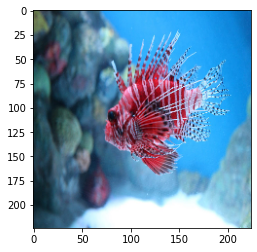

In [0]:
plt.imshow(po[1])
plt.show()
# /255 Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

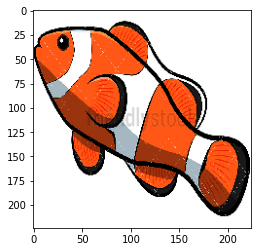

In [0]:
plt.imshow(ne[1])
plt.show()

In [0]:
# cv2.imshow(ne[1]) # DisabledFunctionError 

In [0]:
x = np.vstack((po,ne)) # (640, 224, 224, 3) all img data
y_po = np.array(imgnum_each_class*[1]) # create labels for lionfish :1
y_ne = np.array(imgnum_each_class*[0]) # vreate labels for negatives :0
y = np.hstack((y_po,y_ne)) # labels for all img data (640,)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [0]:
y_train

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [0]:
num_classes=2
y_train = keras.utils.to_categorical(y_train, num_classes) #y_train.shape (448, 2)
y_test = keras.utils.to_categorical(y_test, num_classes) # y_test.shape (192, 2)
y_train.shape

(448, 2)

# ***CNN build from scratch***

## ***base_model function***

In [0]:
'''def lr_schedule(epoch):
  lr = 1e-3
  if epoch > 40:
    lr *= 1e-4
  elif epoch > 30:
    lr *= 1e-3
  elif epoch > 20:
    lr *= 1e-2
  elif epoch > 10:
    lr *= 1e-1
  print('Learning rate: ', lr)
  return lr'''

In [0]:
def base_model(optimizer='adam',dropout_rate=0,activation ='relu'):
  model_scratch = Sequential()
  model_scratch.add(Conv2D(32, (3, 3),activation=activation,padding='same',input_shape=x_train.shape[1:],name='k1'))
  model_scratch.add(Conv2D(32, (3, 3),activation=activation,name='k2'))
  model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

  model_scratch.add(Conv2D(64, (3, 3), padding='same',activation=activation))
  model_scratch.add(Conv2D(64, (3, 3),activation=activation))
  model_scratch.add(MaxPooling2D(pool_size=(3, 3)))

  model_scratch.add(Conv2D(128, (3, 3), padding='same',activation=activation))
  model_scratch.add(Conv2D(128, (3, 3),activation=activation))
  model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

  model_scratch.add(Conv2D(256, (3, 3), padding='same',activation=activation))
  model_scratch.add(Conv2D(256, (3, 3),activation=activation))
  model_scratch.add(MaxPooling2D(pool_size=(3, 3)))

  model_scratch.add(Flatten())
  model_scratch.add(Dense(128,activation=activation))
  model_scratch.add(Dropout(dropout_rate))
  model_scratch.add(Dense(64,activation=activation))
  model_scratch.add(Dropout(dropout_rate))
  model_scratch.add(Dense(num_classes,activation='softmax'))

  model_scratch.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

  return model_scratch

In [0]:
k_model = base_model()
k_model.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
k1 (Conv2D)                  (None, 224, 224, 32)      896       
_________________________________________________________________
k2 (Conv2D)                  (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
____________________

In [0]:
# model_scratch.compile(loss='categorical_crossentropy',optimizer=Adam(lr=lr_schedule(0)),metrics=['accuracy'])

In [0]:
# build_fn: construct, compile and return a Keras model, which will then be used to fit/predict.
model = KerasClassifier(build_fn=base_model)

## ***GridSearchCV***

In [0]:
#create dict of params for tuning
# sgd = SGD(learning_rate=lr_schedule(0))
# adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
param_grid = {
    'epochs' : [40],
    'batch_size' : [32,64],
    'optimizer' : ['SGD','RMSprop','Adam','Nadam'], 
    'activation' : ['relu','tanh','sigmoid'],
    'dropout_rate': [0,0.25,0.5]
    }

In [0]:
# don't touch it or we will lose the output info
#instatiate and test GridSearchCV cross validation
# will take long time to compute
start_time = time.time()
gs = GridSearchCV(estimator=model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
#fit GridSearchCV model
grid = gs.fit(x_train,y_train)

#best score
best_score = grid.best_score_
#best params
best_params = grid.best_params_

#print out results
print ('GridSearch Score = ' , best_score)
print ('GridSearch Best Parameters = ' , best_params)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 191.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 211.0min finished





Epoch 1/40





448/448 [==============================] - 8s 17ms/step - loss: 0.6947 - acc: 0.4888
Epoch 2/40
448/448 [==============================] - 2s 4ms/step - loss: 0.5974 - acc: 0.7567
Epoch 3/40
448/448 [==============================] - 2s 4ms/step - loss: 0.4037 - acc: 0.8705
Epoch 4/40
448/448 [==============================] - 2s 4ms/step - loss: 0.3371 - acc: 0.8929
Epoch 5/40
448/448 [==============================] - 2s 4ms/step - loss: 0.3084 - acc: 0.8906
Epoch 6/40
448/448 [==============================] - 2s 4ms/step - loss: 0.2572 - acc: 0.9107
Epoch 7/40
448/448 [==============================] - 2s 4ms/step - loss: 0.2179 - acc: 0.9174
Epoch 8/40
448/448 [==============================] - 2s 4ms/step - loss: 0.2097 - acc: 0.9196
Epoch 9/40
448/448 [==============================] - 2s 4ms/step - loss: 0.1448 - acc: 0.9442
Epoch 10/40
448/448 [==============================] - 2s 4ms/step - loss: 0.2818 - acc: 0.8549
Epoch 11/40
448/448 [===================

In [0]:
best_epochs = best_params['epochs']
best_batch_size = best_params['batch_size']
best_optimizer = best_params['optimizer'] # cannot be used in the fit as this argument is overlooked by .fit method
best_activation = best_params['activation']
best_dropout_rate = best_params['dropout_rate']

In [0]:
print(best_epochs,best_batch_size,best_optimizer,best_activation,best_dropout_rate)

40 32 Adam relu 0


In [0]:
# def base_model(optimizer='adam',dropout_rate=0,activation ='relu'):
# the default the settings are all the best_params
history = model.fit(x_train,y_train,epochs=best_epochs,batch_size=best_batch_size,verbose=1,
                    validation_data=(x_test, y_test))

Train on 448 samples, validate on 192 samples
Epoch 1/40
448/448 [==============================] - 5s 11ms/step - loss: 0.7445 - acc: 0.5201 - val_loss: 0.6920 - val_acc: 0.5312
Epoch 2/40
448/448 [==============================] - 2s 4ms/step - loss: 0.6686 - acc: 0.6183 - val_loss: 0.5970 - val_acc: 0.6510
Epoch 3/40
448/448 [==============================] - 2s 4ms/step - loss: 0.5435 - acc: 0.7701 - val_loss: 0.5030 - val_acc: 0.8281
Epoch 4/40
448/448 [==============================] - 2s 4ms/step - loss: 0.4195 - acc: 0.8460 - val_loss: 0.2364 - val_acc: 0.9010
Epoch 5/40
448/448 [==============================] - 2s 4ms/step - loss: 0.3545 - acc: 0.8549 - val_loss: 0.2580 - val_acc: 0.9167
Epoch 6/40
448/448 [==============================] - 2s 4ms/step - loss: 0.3357 - acc: 0.8884 - val_loss: 0.2747 - val_acc: 0.9323
Epoch 7/40
448/448 [==============================] - 2s 4ms/step - loss: 0.2788 - acc: 0.8951 - val_loss: 0.1708 - val_acc: 0.9427
Epoch 8/40
448/448 [=========

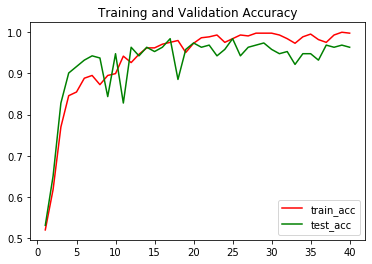

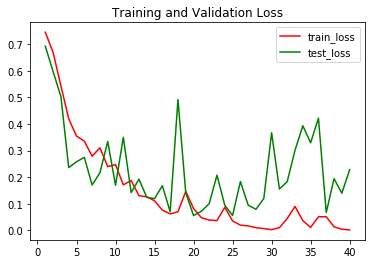

In [0]:
#custom line colors
x = range(1, best_epochs+1)
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(x, train_acc, 'r') # label='training accuracy'
plt.plot(x, val_acc, 'g') # label='validation accuracy'
plt.title('Training and Validation Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')

plt.figure()
plt.plot(x, train_loss, 'r') # label='training loss'
plt.plot(x, val_loss, 'g') # label='validation loss'
plt.title('Training and Validation Loss')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

In [0]:
# can't get the final result without setting n_jobs=-1, the function has a little bit conflict between the n_jobs and the verbose
# without setting n_jobs=-1, verbose=0 or 1 can't make changes
# so the issue is the output size limit 
'''#instatiate and test GridSearchCV cross validation
# will take long time to compute
start_time = time.time()
gs = GridSearchCV(estimator=model_gs,param_grid=param_grid,cv=3,verbose=1)
#fit GridSearchCV model
grid = gs.fit(x_train,y_train)

#best score
best_score = grid.best_score_
#best params
best_params = grid.best_params_

#print out results
print ('GridSearch Score = ' , best_score)
print ('GridSearch Best Parameters = ' , best_params)
print("--- %s seconds ---" % (time.time() - start_time))'''

# Buffered data was truncated after reaching the output size limit.

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.





Epoch 1/40





298/298 [==============================] - 19s 64ms/step - loss: 0.6935 - acc: 0.4664
Epoch 2/40
298/298 [==============================] - 1s 4ms/step - loss: 0.6921 - acc: 0.5403
Epoch 3/40
298/298 [==============================] - 1s 4ms/step - loss: 0.6912 - acc: 0.5369
Epoch 4/40
298/298 [==============================] - 1s 4ms/step - loss: 0.6906 - acc: 0.5369
Epoch 5/40
298/298 [==============================] - 1s 4ms/step - loss: 0.6899 - acc: 0.5369
Epoch 6/40
298/298 [==============================] - 1s 4ms/step - loss: 0.6894 - acc: 0.5369
Epoch 7/40
298/298 [==============================] - 1s 4ms/step - loss: 0.6886 - acc: 0.5369
Epoch 8/40
298/298 [==============================] - 1s 4ms/step - loss: 0.6885 - acc: 0.5369
Epoch 9/40
298/298 [==============================] - 1s 4ms/step - loss: 0.6878 - acc: 0.5369
Epoch 10/40
298/298 [==============================] - 1s 4ms/step - loss: 0.6869 - acc: 0.5369
Epoch 11/40
298/298 [==================

## ***RandomizedSearchCV***

In [0]:
from scipy.stats import randint as sp_randInt

param_grid2 = {
    'epochs' : np.arange(20,40),
    'batch_size' : np.arange(32,64),}

makes life hard!!

Cannot clone object <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f498cb65940>, as the constructor either does not set or modifies parameter epochs

SOLVE: param_grid2 = {
    'epochs' : sp_randInt(20,45),
    'batch_size' : sp_randInt(32,64),

In [0]:
#create dict of params for tuning
# sgd = SGD(learning_rate=lr_schedule(0))
# adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
param_grid2 = {
    'epochs' : sp_randInt(20,45),
    'batch_size' : sp_randInt(32,64),
    'optimizer' : ['SGD','RMSprop','Adam','Nadam'], 
    'activation' : ['relu','tanh','sigmoid'],
    # 'dropout_rate': np.random.uniform(0,0.5)  Parameter value is not iterable or distribution (key='dropout_rate', value=0.3037379553549866)
    'dropout_rate': [0,0.25,0.5]
    }

In [0]:
'''start_time = time.time()
#RandomizedSearchCV
#n_iter must be no higher than the numner of parameters to check
n_iter = 35

#instatiate and test RandomizedSearch for time and score against GridSearchCV
rand_search = RandomizedSearchCV(model,param_distributions=param_grid2,n_iter=n_iter,cv=3,verbose=2)

#fit RandomizedSearchCV model
rand = rand_search.fit(x_train,y_train)

#best score
best_score = rand.best_score_
#best params
best_params = rand.best_params_

#print out results
print ('Randomized Score = ' , best_score)
print ('Randomized Best Parameters = ' , best_params)

print("--- %s seconds ---" % (time.time() - start_time))'''

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] activation=tanh, batch_size=46, dropout_rate=0, epochs=34, optimizer=SGD 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.





Epoch 1/34





298/298 [==============================] - 20s 69ms/step - loss: 0.6444 - acc: 0.6174
Epoch 2/34
298/298 [==============================] - 1s 4ms/step - loss: 0.5472 - acc: 0.7282
Epoch 3/34
298/298 [==============================] - 1s 4ms/step - loss: 0.5328 - acc: 0.7349
Epoch 4/34
298/298 [==============================] - 1s 4ms/step - loss: 0.4171 - acc: 0.8054
Epoch 5/34
298/298 [==============================] - 1s 4ms/step - loss: 0.5098 - acc: 0.7886
Epoch 6/34
298/298 [==============================] - 1s 4ms/step - loss: 0.3676 - acc: 0.8758
Epoch 7/34
298/298 [==============================] - 1s 4ms/step - loss: 0.3123 - acc: 0.8859
Epoch 8/34
298/298 [==============================] - 1s 4ms/step - loss: 0.3630 - acc: 0.8658
Epoch 9/34
298/298 [==============================] - 1s 4ms/step - loss: 0.2667 - acc: 0.9262
Epoch 10/34
298/298 [==============================] - 1s 4ms/step - loss: 0.3148 - acc: 0.8591
Epoch 11/34
298/298 [==================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.5s remaining:    0.0s


Epoch 1/34
299/299 [==============================] - 3s 11ms/step - loss: 0.6915 - acc: 0.4983
Epoch 2/34
299/299 [==============================] - 1s 4ms/step - loss: 0.5818 - acc: 0.7090
Epoch 3/34
299/299 [==============================] - 1s 4ms/step - loss: 0.5071 - acc: 0.7759
Epoch 4/34
299/299 [==============================] - 1s 4ms/step - loss: 0.4772 - acc: 0.7793
Epoch 5/34
299/299 [==============================] - 1s 4ms/step - loss: 0.3984 - acc: 0.8595
Epoch 6/34
299/299 [==============================] - 1s 4ms/step - loss: 0.4447 - acc: 0.7926
Epoch 7/34
299/299 [==============================] - 1s 4ms/step - loss: 0.4021 - acc: 0.8194
Epoch 8/34
299/299 [==============================] - 1s 4ms/step - loss: 0.2991 - acc: 0.9097
Epoch 9/34
299/299 [==============================] - 1s 4ms/step - loss: 0.2803 - acc: 0.9030
Epoch 10/34
299/299 [==============================] - 1s 4ms/step - loss: 0.4115 - acc: 0.7993
Epoch 11/34
299/299 [===========================

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed: 91.2min finished


Epoch 1/25
448/448 [==============================] - 17s 37ms/step - loss: 0.6995 - acc: 0.5737
Epoch 2/25
448/448 [==============================] - 2s 4ms/step - loss: 0.6406 - acc: 0.7411
Epoch 3/25
448/448 [==============================] - 2s 4ms/step - loss: 0.5409 - acc: 0.8192
Epoch 4/25
448/448 [==============================] - 2s 4ms/step - loss: 0.4624 - acc: 0.8504
Epoch 5/25
448/448 [==============================] - 2s 4ms/step - loss: 0.3641 - acc: 0.8594
Epoch 6/25
448/448 [==============================] - 2s 4ms/step - loss: 0.3356 - acc: 0.8772
Epoch 7/25
448/448 [==============================] - 2s 4ms/step - loss: 0.2755 - acc: 0.8973
Epoch 8/25
448/448 [==============================] - 2s 4ms/step - loss: 0.2191 - acc: 0.9219
Epoch 9/25
448/448 [==============================] - 2s 4ms/step - loss: 0.2151 - acc: 0.9062
Epoch 10/25
448/448 [==============================] - 2s 4ms/step - loss: 0.2203 - acc: 0.9308
Epoch 11/25
448/448 [==========================

In [0]:
best_epochs = best_params['epochs']
best_batch_size = best_params['batch_size']
best_optimizer = best_params['optimizer'] # cannot be used in the fit as this argument is overlooked by .fit method
best_activation = best_params['activation']
best_dropout_rate = best_params['dropout_rate']

In [0]:
print(best_epochs,best_batch_size,best_optimizer,best_activation,best_dropout_rate)

25 56 Adam relu 0


In [0]:
# now we use k_model(the base model) instead of KerasClassifier model
history = k_model.fit(x_train,y_train,epochs=best_epochs,batch_size=best_batch_size,verbose=1,
                    validation_data=(x_test, y_test))




Train on 448 samples, validate on 192 samples
Epoch 1/25





448/448 [==============================] - 21s 47ms/step - loss: 0.7119 - acc: 0.4754 - val_loss: 0.6965 - val_acc: 0.4688
Epoch 2/25
448/448 [==============================] - 2s 4ms/step - loss: 0.6893 - acc: 0.5134 - val_loss: 0.6682 - val_acc: 0.4688
Epoch 3/25
448/448 [==============================] - 2s 4ms/step - loss: 0.5766 - acc: 0.6339 - val_loss: 0.4981 - val_acc: 0.8802
Epoch 4/25
448/448 [==============================] - 2s 4ms/step - loss: 0.5199 - acc: 0.8170 - val_loss: 0.4779 - val_acc: 0.9010
Epoch 5/25
448/448 [==============================] - 2s 4ms/step - loss: 0.4639 - acc: 0.8460 - val_loss: 0.4211 - val_acc: 0.8177
Epoch 6/25
448/448 [==============================] - 2s 4ms/step - loss: 0.3273 - acc: 0.8616 - val_loss: 0.4310 - val_acc: 0.8750
Epoch 7/25
448/448 [==============================] - 2s 4ms/step - loss: 0.3435 - acc: 0.8772 - val_loss: 0.2675 - val_acc: 0.9219
Epoch 8/25
448/448 [

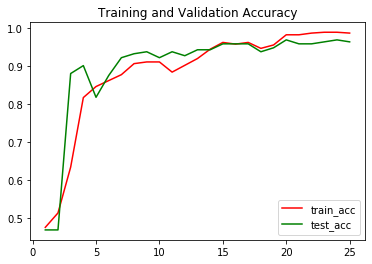

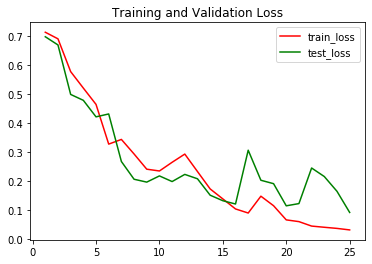

In [0]:
#custom line colors
x = range(1, best_epochs+1)
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(x, train_acc, 'r') # label='training accuracy'
plt.plot(x, val_acc, 'g') # label='validation accuracy'
plt.title('Training and Validation Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')

plt.figure()
plt.plot(x, train_loss, 'r') # label='training loss'
plt.plot(x, val_loss, 'g') # label='validation loss'
plt.title('Training and Validation Loss')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

## ***visualize the filters***

1st Convolutional Layer 1st channel


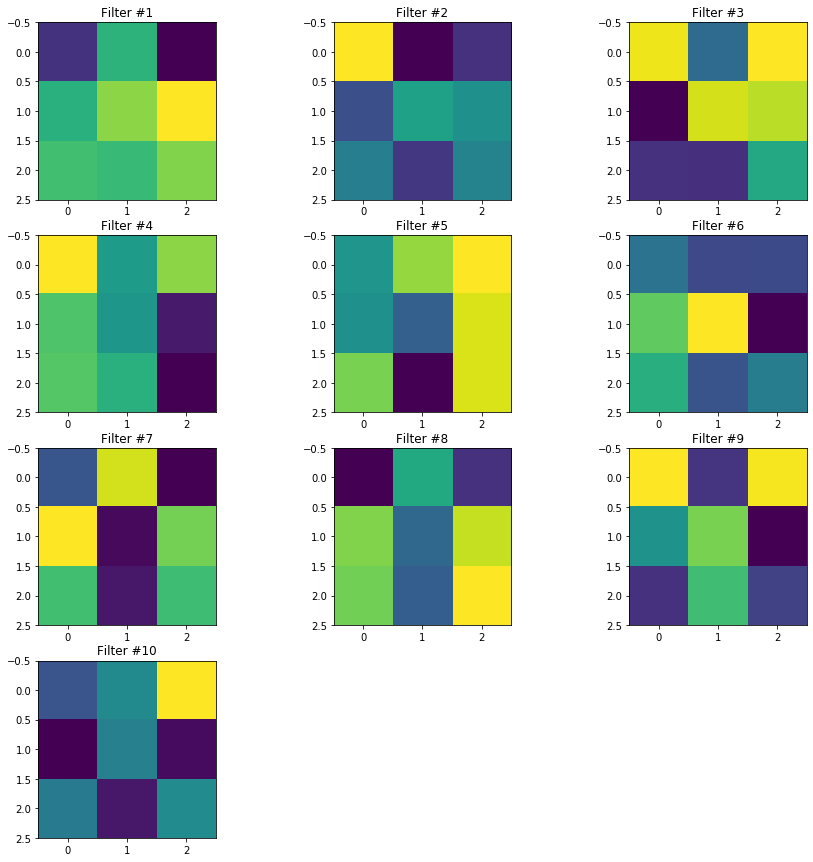

last Convolutional Layer 1st channel


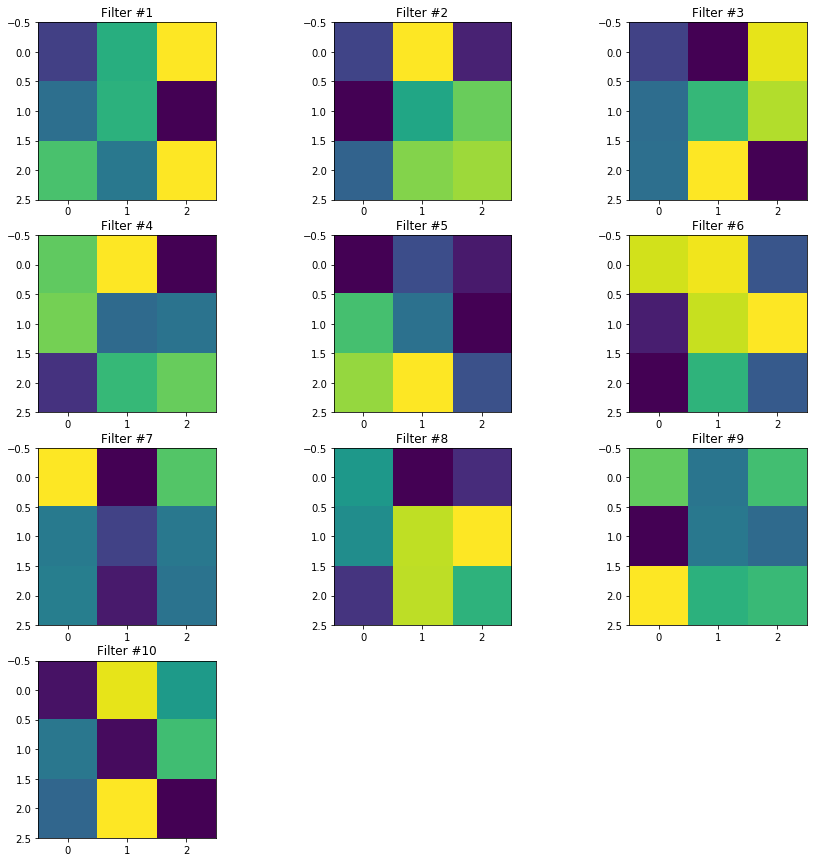

In [0]:
# layers[0]: 1st conv layer 
# get_weights()[0]: [0]:weights,[1]:biases
# weights.shape: (3,3,3,32) [:,:,0,:]: 1st channel
# weight.shape (3,3,32) weight[:,:,i]: ith filter
weight = k_model.layers[0].get_weights()[0][:,:,0,:]
plt.figure(figsize=(15,15))
# show 10 filters
for i in range(0,10):
    plt.subplot(4,3,i+1)
    plt.title('Filter #' + str(i+1))
    plt.imshow(weight[:,:,i])# cmap="gray"

print('1st Convolutional Layer 1st channel')
plt.show()

# show the last conv layer 1st channel weights
weight = k_model.layers[10].get_weights()[0][:,:,0,:]
plt.figure(figsize=(15,15))
# show 10 filters
for i in range(0,10):
    plt.subplot(4,3,i+1)
    plt.title('Filter #' + str(i+1))
    plt.imshow(weight[:,:,i])

print('last Convolutional Layer 1st channel')
plt.show()

## ***visualize the activations***

In [0]:
po_img=po[1]
po_img = np.expand_dims(po_img, axis=0)
print(po_img.shape)
ne_img=ne[1]
ne_img = np.expand_dims(ne_img, axis=0)
print(ne_img.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [0]:
print(k_model.predict(po_img))
print(k_model.predict(ne_img))

[[0.00920146 0.9907986 ]]
[[1.0000000e+00 2.2014571e-08]]


In [0]:
layer_outputs = [layer.output for layer in k_model.layers[:11]]
activation_model = Model(inputs=k_model.input,outputs=layer_outputs)

In [0]:
po_activations = activation_model.predict(po_img)
ne_activations = activation_model.predict(ne_img)

In [0]:
po_first_conv_activation = po_activations[0]
po_fifth_conv_activation = po_activations[6]
po_last_conv_activation = po_activations[10]
print(po_first_conv_activation.shape)
print(po_fifth_conv_activation.shape)
print(po_last_conv_activation.shape)

(1, 224, 224, 32)
(1, 36, 36, 128)
(1, 15, 15, 256)


In [0]:
ne_first_conv_activation = ne_activations[0]
ne_fifth_conv_activation = ne_activations[6]
ne_last_conv_activation = ne_activations[10]
print(ne_first_conv_activation.shape)
print(ne_fifth_conv_activation.shape)
print(ne_last_conv_activation.shape)

(1, 224, 224, 32)
(1, 36, 36, 128)
(1, 15, 15, 256)


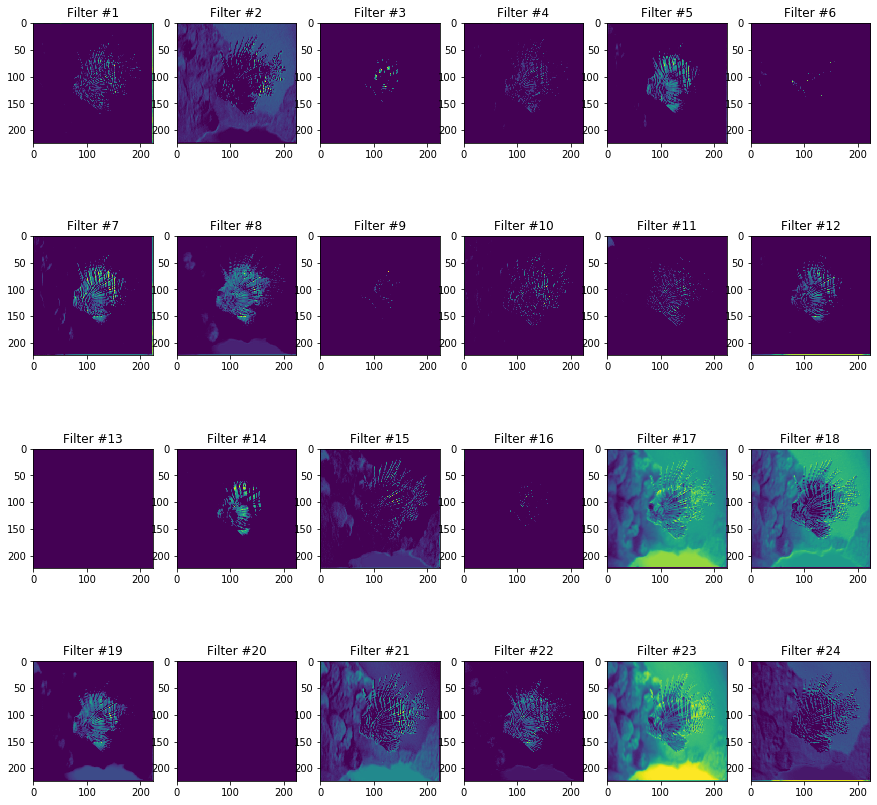

In [0]:
plt.figure(figsize=(15,15))
# show 10 filters
for i in range(24):
  plt.subplot(4,6,i+1)
  plt.title('Filter #' + str(i+1))
  plt.imshow(po_first_conv_activation[0, :, :, i])

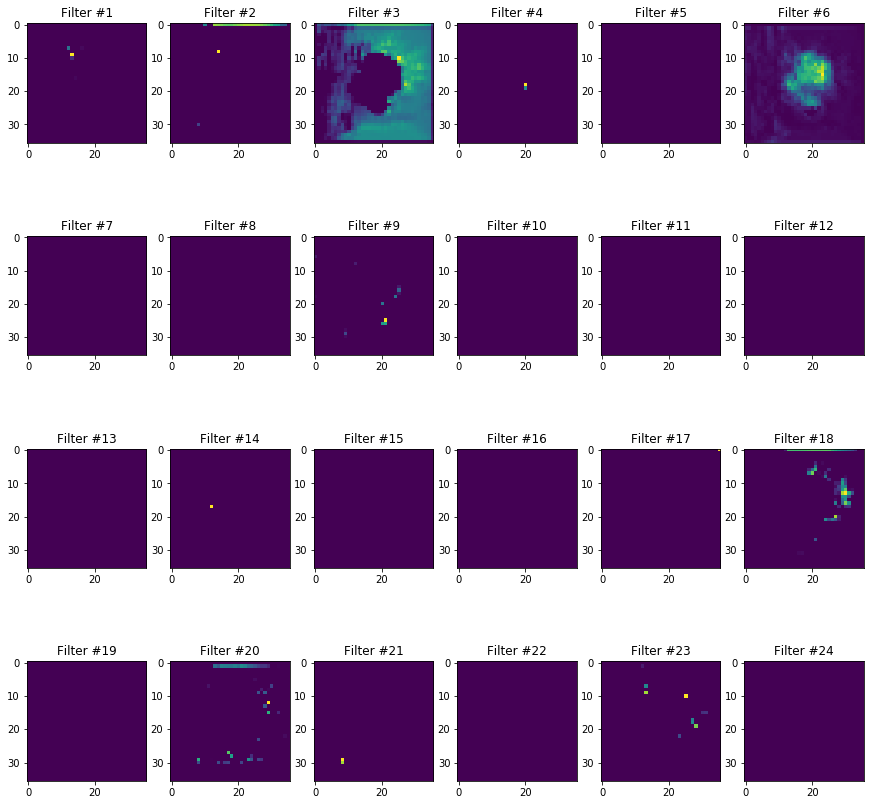

In [0]:
plt.figure(figsize=(15,15))
# show 10 filters
for i in range(24):
  plt.subplot(4,6,i+1)
  plt.title('Filter #' + str(i+1))
  plt.imshow(po_fifth_conv_activation[0, :, :, i])

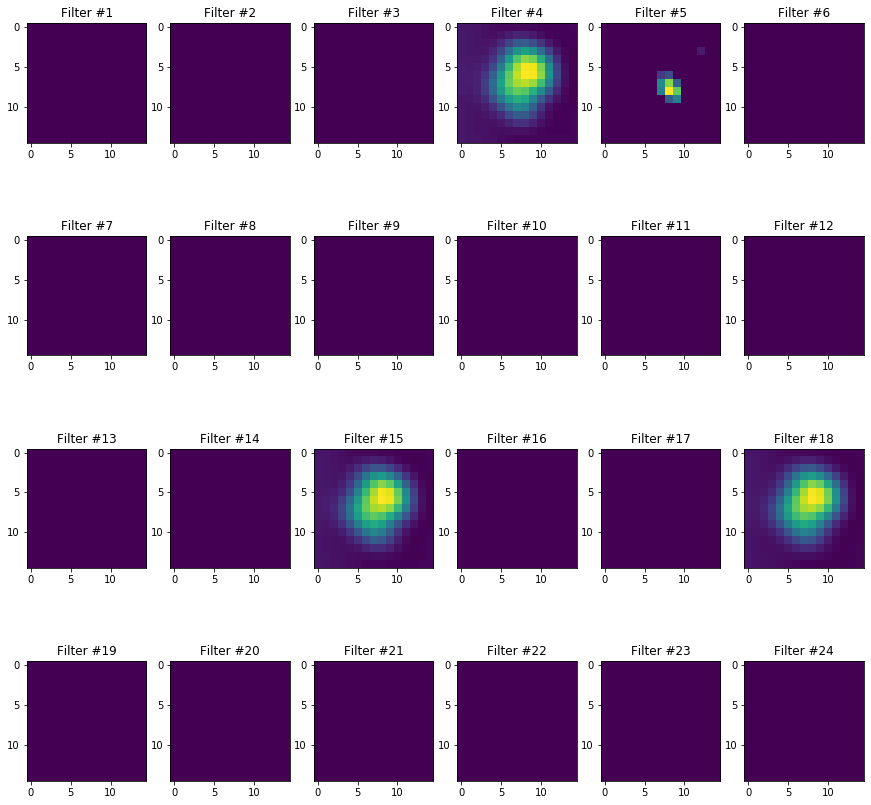

In [0]:
plt.figure(figsize=(15,15))
# show 10 filters
for i in range(24):
  plt.subplot(4,6,i+1)
  plt.title('Filter #' + str(i+1))
  plt.imshow(po_last_conv_activation[0, :, :, i])

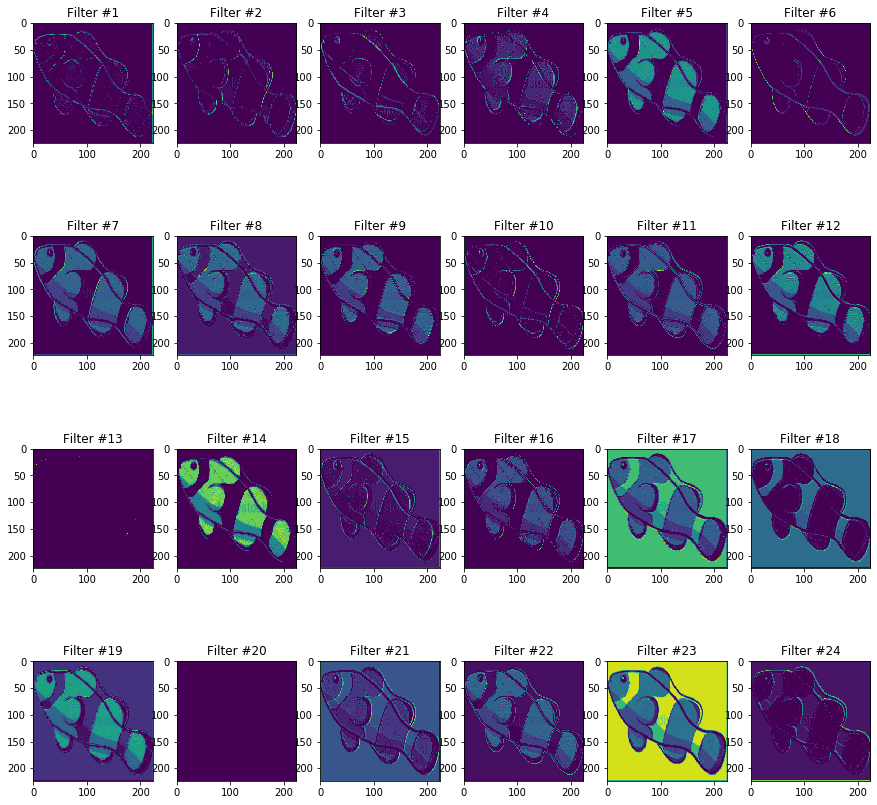

In [0]:
plt.figure(figsize=(15,15))
# show 10 filters
for i in range(24):
  plt.subplot(4,6,i+1)
  plt.title('Filter #' + str(i+1))
  plt.imshow(ne_first_conv_activation[0, :, :, i])

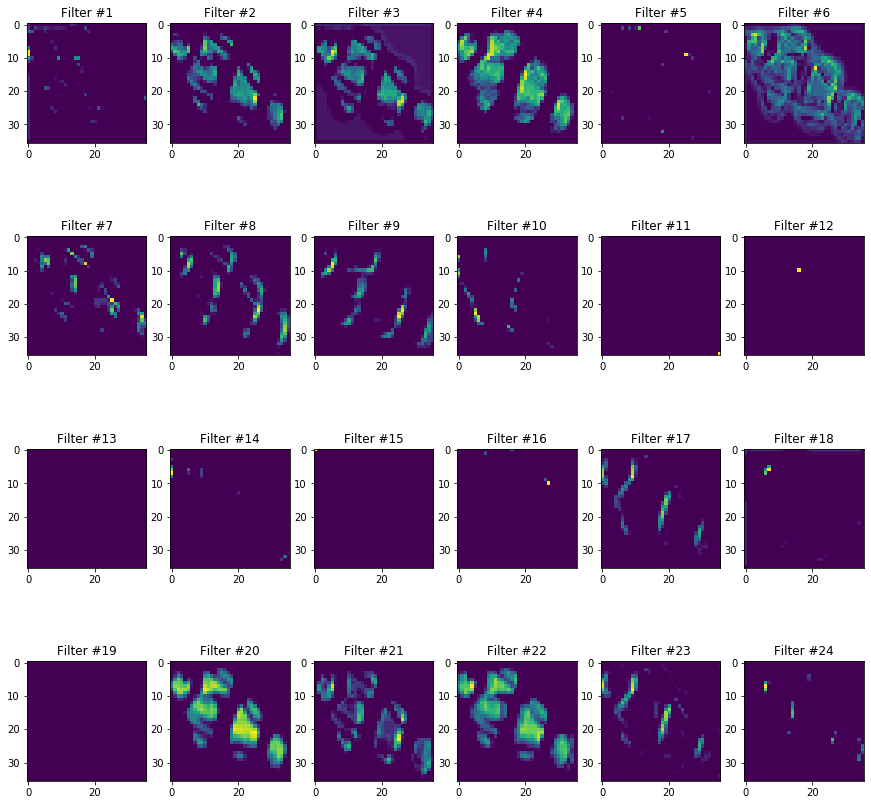

In [0]:
plt.figure(figsize=(15,15))
# show 10 filters
for i in range(24):
  plt.subplot(4,6,i+1)
  plt.title('Filter #' + str(i+1))
  plt.imshow(ne_fifth_conv_activation[0, :, :, i])

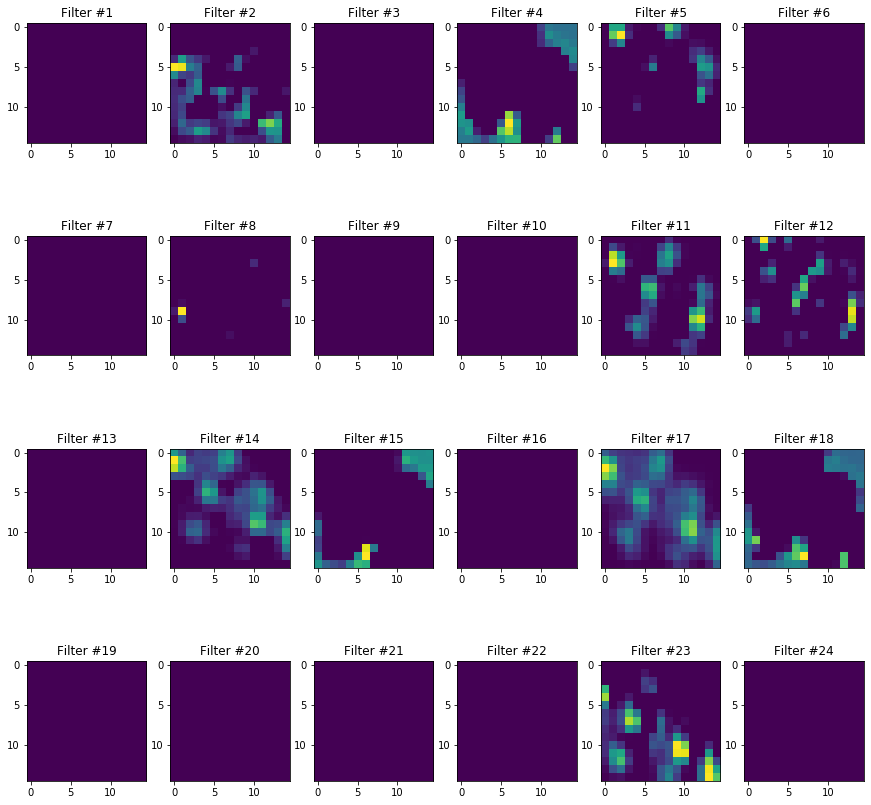

In [0]:
plt.figure(figsize=(15,15))
# show 10 filters
for i in range(24):
  plt.subplot(4,6,i+1)
  plt.title('Filter #' + str(i+1))
  plt.imshow(ne_last_conv_activation[0, :, :, i])

# ***Pretrained model***

## ***basic config***

In [0]:
# pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 3.9MB 48.5MB/s 
     |████████████████████████████████| 450kB 77.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

2.2.0-rc1


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Flatten, Dense, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, UpSampling2D, ZeroPadding2D
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


## ***read dataset***

In [0]:
from google.colab import drive # coonect to my private google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = "/content/gdrive/My Drive/Colab Notebooks/DL_for_software/final"
os.chdir(path)
os.listdir(path) # show the path

['model_densenet121.h5',
 'model_vgg16.h5',
 'model_nasnet.h5',
 'lionfish',
 'clownfish',
 'lionfish.ipynb']

In [0]:
imgnum_each_class = 320

def read_directory(directory_name):
  imgindex=0 
  imgs = np.empty((imgnum_each_class,224,224,3),dtype=np.float32) 
  for filename in os.listdir(directory_name): 
    img = load_img(directory_name + "/" + filename,target_size=(224,224), color_mode='rgb')
    img = img_to_array(img)/255 # img=mpimg.imread(directory_name + "/" + filename)
    # img = img.astype('float32') can't change dtype if np.empty use the default float64
    imgs[imgindex,:,:,:] = img
    imgindex += 1
    if(imgindex>=imgnum_each_class):
      break
  print(imgindex)
  return imgs

po = read_directory('lionfish')
ne = read_directory('clownfish')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


320


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


320


In [0]:
x = np.vstack((po,ne)) # (640, 224, 224, 3) all img data
y_po = np.array(imgnum_each_class*[1]) # create labels for lionfish :1
y_ne = np.array(imgnum_each_class*[0]) # vreate labels for negatives :0
y = np.hstack((y_po,y_ne)) # labels for all img data (640,)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(128, 224, 224, 3)
(512, 224, 224, 3)
(128,)
(512,)


In [0]:
num_classes=2
y_train = keras.utils.to_categorical(y_train, num_classes) #y_train.shape (448, 2)
y_test = keras.utils.to_categorical(y_test, num_classes) # y_test.shape (192, 2)
y_train.shape

(128, 2)

In [0]:
trainset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
testset = tf.data.Dataset.from_tensor_slices((x_test,y_test))

tf.Tensor([1. 0.], shape=(2,), dtype=float32)


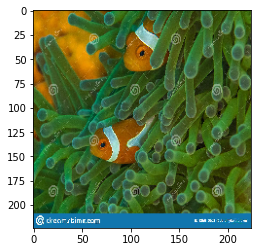

In [0]:
for image, label in trainset.take(1):
  plt.figure()
  plt.imshow(image)
  print(label)

In [0]:
trainset = trainset.shuffle(buffer_size=1000).batch(32)

In [0]:
for image, label in trainset.take(1):
  print(label.shape)
  print(image.shape)

(32, 2)
(32, 224, 224, 3)


In [0]:
testset = testset.batch(32)

## ***from scratch***

In [0]:
def base_model(optimizer='adam',dropout_rate=0,activation ='relu'):
  model_scratch = tf.keras.models.Sequential()
  model_scratch.add(tf.keras.layers.Conv2D(32, (3, 3),activation=activation,padding='same',input_shape=x_train.shape[1:],name='k1'))
  model_scratch.add(tf.keras.layers.Conv2D(32, (3, 3),activation=activation,name='k2'))
  model_scratch.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model_scratch.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation=activation))
  model_scratch.add(tf.keras.layers.Conv2D(64, (3, 3),activation=activation))
  model_scratch.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

  model_scratch.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same',activation=activation))
  model_scratch.add(tf.keras.layers.Conv2D(128, (3, 3),activation=activation))
  model_scratch.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model_scratch.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same',activation=activation))
  model_scratch.add(tf.keras.layers.Conv2D(256, (3, 3),activation=activation))
  model_scratch.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

  model_scratch.add(tf.keras.layers.Flatten())
  model_scratch.add(tf.keras.layers.Dense(128,activation=activation))
  model_scratch.add(tf.keras.layers.Dropout(dropout_rate))
  model_scratch.add(tf.keras.layers.Dense(64,activation=activation))
  model_scratch.add(tf.keras.layers.Dropout(dropout_rate))
  model_scratch.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

  model_scratch.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

  return model_scratch

In [0]:
model_scratch = base_model()
model_scratch.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
k1 (Conv2D)                  (None, 224, 224, 32)      896       
_________________________________________________________________
k2 (Conv2D)                  (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 36, 36, 128)     

In [0]:
history = model_scratch.fit(trainset,epochs=40,verbose=1,validation_data=testset)

Train for 4 steps, validate for 16 steps
Epoch 1/40
4/4 [==============================] - 2s 398ms/step - loss: 0.7043 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.6172
Epoch 2/40
4/4 [==============================] - 1s 229ms/step - loss: 0.7118 - accuracy: 0.5078 - val_loss: 0.6868 - val_accuracy: 0.5840
Epoch 3/40
4/4 [==============================] - 1s 233ms/step - loss: 0.6802 - accuracy: 0.5625 - val_loss: 0.6488 - val_accuracy: 0.5156
Epoch 4/40
4/4 [==============================] - 1s 235ms/step - loss: 0.5341 - accuracy: 0.7109 - val_loss: 0.5552 - val_accuracy: 0.8359
Epoch 5/40
4/4 [==============================] - 1s 242ms/step - loss: 0.4195 - accuracy: 0.8359 - val_loss: 1.1492 - val_accuracy: 0.8672
Epoch 6/40
4/4 [==============================] - 1s 230ms/step - loss: 0.3960 - accuracy: 0.8828 - val_loss: 1.0527 - val_accuracy: 0.8613
Epoch 7/40
4/4 [==============================] - 1s 239ms/step - loss: 0.2880 - accuracy: 0.9297 - val_loss: 0.6700 - 

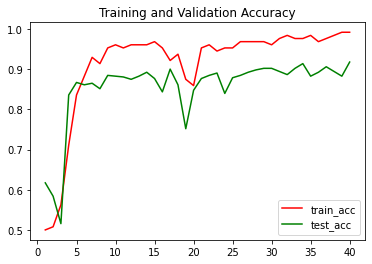

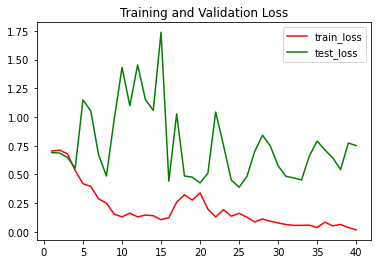

In [0]:
#custom line colors
x = range(1, 40+1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(x, train_acc, 'r') # label='training accuracy'
plt.plot(x, val_acc, 'g') # label='validation accuracy'
plt.title('Training and Validation Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')

plt.figure()
plt.plot(x, train_loss, 'r') # label='training loss'
plt.plot(x, val_loss, 'g') # label='validation loss'
plt.title('Training and Validation Loss')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

## ***pretrained VGG16***

In [0]:
vgg_withtop = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),include_top=True,weights=None)
vgg_withtop.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
base_model = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
base_model.trainable=False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
flatten_layer = tf.keras.layers.Flatten()
dense1 = tf.keras.layers.Dense(4096)
dense2 = tf.keras.layers.Dense(4096)
prediction = tf.keras.layers.Dense(2,activation='softmax')

model_vgg = tf.keras.Sequential([
    base_model,
    flatten_layer,
    dense1,
    dense2,
    prediction                               
])

In [0]:
model_vgg.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_23 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_68 (Dense)             (None, 4096)              102764544 
_________________________________________________________________
dense_69 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 8194      
Total params: 134,268,738
Trainable params: 119,554,050
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [0]:
history = model_vgg.fit(trainset,epochs=15,validation_data=testset)

Train for 4 steps, validate for 16 steps
Epoch 1/15
4/4 [==============================] - 2s 614ms/step - loss: 8.1672 - accuracy: 0.5625 - val_loss: 14.5123 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 2s 463ms/step - loss: 5.9935 - accuracy: 0.6172 - val_loss: 4.9528 - val_accuracy: 0.5137
Epoch 3/15
4/4 [==============================] - 2s 461ms/step - loss: 1.3802 - accuracy: 0.8438 - val_loss: 1.8505 - val_accuracy: 0.7910
Epoch 4/15
4/4 [==============================] - 2s 465ms/step - loss: 1.4372 - accuracy: 0.8672 - val_loss: 1.2682 - val_accuracy: 0.8496
Epoch 5/15
4/4 [==============================] - 2s 462ms/step - loss: 0.3320 - accuracy: 0.9688 - val_loss: 0.3368 - val_accuracy: 0.9512
Epoch 6/15
4/4 [==============================] - 2s 461ms/step - loss: 0.1580 - accuracy: 0.9531 - val_loss: 0.6699 - val_accuracy: 0.8984
Epoch 7/15
4/4 [==============================] - 2s 462ms/step - loss: 0.0477 - accuracy: 0.9766 - val_loss: 0.2434 -

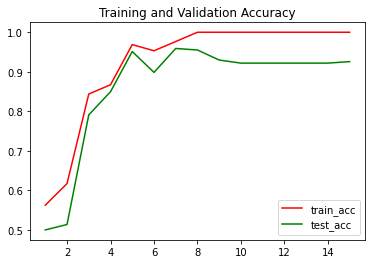

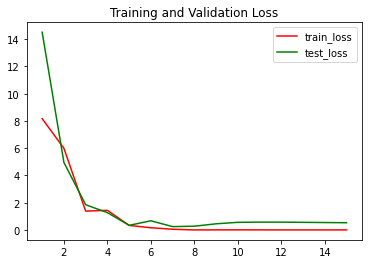

In [0]:
#custom line colors
x = range(1, 15+1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(x, train_acc, 'r') # label='training accuracy'
plt.plot(x, val_acc, 'g') # label='validation accuracy'
plt.title('Training and Validation Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')

plt.figure()
plt.plot(x, train_loss, 'r') # label='training loss'
plt.plot(x, val_loss, 'g') # label='validation loss'
plt.title('Training and Validation Loss')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

In [0]:
base_model.layers[:6]

In [0]:
base_model.trainable = True
# Freeze some layers
for layer in base_model.layers[:6]:
  layer.trainable =  False

In [0]:
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [0]:
model_vgg.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_23 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_68 (Dense)             (None, 4096)              102764544 
_________________________________________________________________
dense_69 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 8194      
Total params: 134,268,738
Trainable params: 134,008,578
Non-trainable params: 260,160
_________________________________________________________________


In [0]:
history_fine = model_vgg.fit(trainset,epochs=35,initial_epoch=history.epoch[-1],validation_data=testset)

Train for 4 steps, validate for 16 steps
Epoch 15/35
4/4 [==============================] - 3s 712ms/step - loss: 3.5271 - accuracy: 0.8281 - val_loss: 1.6209 - val_accuracy: 0.7715
Epoch 16/35
4/4 [==============================] - 2s 531ms/step - loss: 0.1093 - accuracy: 0.9453 - val_loss: 0.3480 - val_accuracy: 0.8359
Epoch 17/35
4/4 [==============================] - 2s 529ms/step - loss: 0.1532 - accuracy: 0.9531 - val_loss: 0.5468 - val_accuracy: 0.8223
Epoch 18/35
4/4 [==============================] - 2s 526ms/step - loss: 0.3331 - accuracy: 0.9141 - val_loss: 0.2213 - val_accuracy: 0.9297
Epoch 19/35
4/4 [==============================] - 2s 531ms/step - loss: 0.1788 - accuracy: 0.9531 - val_loss: 0.1798 - val_accuracy: 0.9531
Epoch 20/35
4/4 [==============================] - 2s 534ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 1.1532 - val_accuracy: 0.7520
Epoch 21/35
4/4 [==============================] - 2s 528ms/step - loss: 0.0388 - accuracy: 0.9766 - val_loss: 0.

In [0]:
train_acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

train_loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

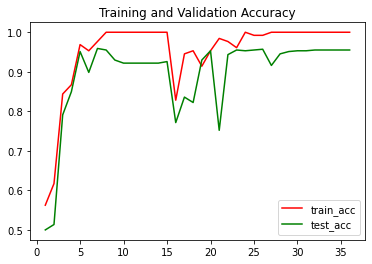

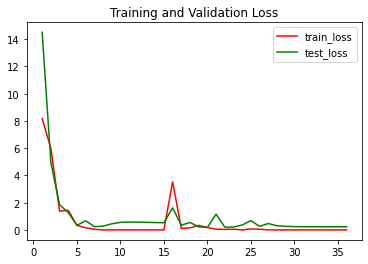

In [0]:
#custom line colors
x = range(1, 36+1)

plt.plot(x, train_acc, 'r') # label='training accuracy'
plt.plot(x, val_acc, 'g') # label='validation accuracy'
plt.title('Training and Validation Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')

plt.figure()
plt.plot(x, train_loss, 'r') # label='training loss'
plt.plot(x, val_loss, 'g') # label='validation loss'
plt.title('Training and Validation Loss')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

In [0]:
model_vgg.save('model_vgg16.h5')

## ***pretrained Densenet201***

In [0]:
densenet_withtop = tf.keras.applications.densenet.DenseNet121(input_shape=(224,224,3),include_top=True,weights=None)
densenet_withtop.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [0]:
base_model = tf.keras.applications.densenet.DenseNet121(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [0]:
base_model.trainable=False
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [0]:
global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()
prediction = tf.keras.layers.Dense(2,activation='softmax')

model_densenet = tf.keras.Sequential([
    base_model,
    global_avg_pool,
    prediction                               
])

In [0]:
model_densenet.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dense_75 (Dense)             (None, 2)                 2050      
Total params: 7,039,554
Trainable params: 2,050
Non-trainable params: 7,037,504
_________________________________________________________________


In [0]:
model_densenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [0]:
history = model_densenet.fit(trainset,epochs=60,validation_data=testset)

Train for 4 steps, validate for 16 steps
Epoch 1/60
4/4 [==============================] - 8s 2s/step - loss: 0.6039 - accuracy: 0.6797 - val_loss: 0.5412 - val_accuracy: 0.6973
Epoch 2/60
4/4 [==============================] - 2s 388ms/step - loss: 0.5885 - accuracy: 0.6484 - val_loss: 0.5309 - val_accuracy: 0.6992
Epoch 3/60
4/4 [==============================] - 2s 384ms/step - loss: 0.5671 - accuracy: 0.6797 - val_loss: 0.5232 - val_accuracy: 0.7012
Epoch 4/60
4/4 [==============================] - 2s 391ms/step - loss: 0.5298 - accuracy: 0.7188 - val_loss: 0.5108 - val_accuracy: 0.7070
Epoch 5/60
4/4 [==============================] - 2s 384ms/step - loss: 0.5296 - accuracy: 0.7031 - val_loss: 0.4943 - val_accuracy: 0.7246
Epoch 6/60
4/4 [==============================] - 2s 386ms/step - loss: 0.5213 - accuracy: 0.7031 - val_loss: 0.4784 - val_accuracy: 0.7520
Epoch 7/60
4/4 [==============================] - 2s 385ms/step - loss: 0.4984 - accuracy: 0.7344 - val_loss: 0.4573 - val

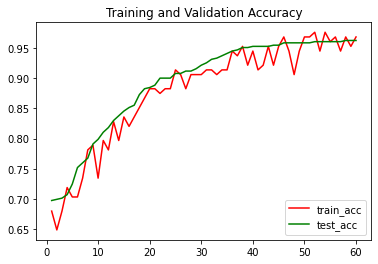

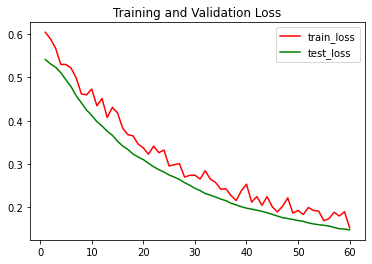

In [0]:
#custom line colors
x = range(1, 60+1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(x, train_acc, 'r') # label='training accuracy'
plt.plot(x, val_acc, 'g') # label='validation accuracy'
plt.title('Training and Validation Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')

plt.figure()
plt.plot(x, train_loss, 'r') # label='training loss'
plt.plot(x, val_loss, 'g') # label='validation loss'
plt.title('Training and Validation Loss')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

In [0]:
base_model.layers[:49]

In [0]:
base_model.trainable = True
# Freeze some layers
for layer in base_model.layers[:49]: # 6 block * 7 layers + 7 input layers
  layer.trainable =  False

In [0]:
model_densenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [0]:
model_densenet.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dense_75 (Dense)             (None, 2)                 2050      
Total params: 7,039,554
Trainable params: 6,611,330
Non-trainable params: 428,224
_________________________________________________________________


In [0]:
history_fine = model_densenet.fit(trainset,epochs=80,initial_epoch=history.epoch[-1]+1,validation_data=testset)

Train for 4 steps, validate for 16 steps
Epoch 61/80
4/4 [==============================] - 12s 3s/step - loss: 0.1378 - accuracy: 0.9609 - val_loss: 0.0538 - val_accuracy: 0.9785
Epoch 62/80
4/4 [==============================] - 2s 469ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 0.9844
Epoch 63/80
4/4 [==============================] - 2s 471ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0333 - val_accuracy: 0.9863
Epoch 64/80
4/4 [==============================] - 2s 477ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9863
Epoch 65/80
4/4 [==============================] - 2s 470ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0261 - val_accuracy: 0.9883
Epoch 66/80
4/4 [==============================] - 2s 469ms/step - loss: 4.3436e-04 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 0.9883
Epoch 67/80
4/4 [==============================] - 2s 469ms/step - loss: 4.2146e-04 - accuracy: 1.0000 - val_lo

In [0]:
train_acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

train_loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

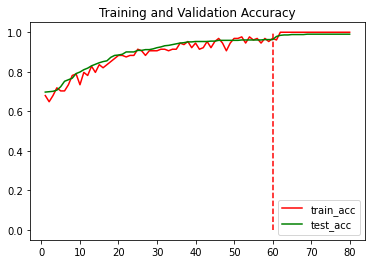

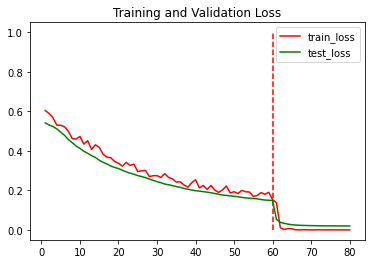

In [0]:
#custom line colors
x = range(1, 80+1)
plt.vlines(60, 0, 1, colors = "r", linestyles = "dashed")
plt.plot(x, train_acc, 'r') # label='training accuracy'
plt.plot(x, val_acc, 'g') # label='validation accuracy'
plt.title('Training and Validation Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')

plt.figure()
plt.vlines(60, 0, 1, colors = "r", linestyles = "dashed")
plt.plot(x, train_loss, 'r') # label='training loss'
plt.plot(x, val_loss, 'g') # label='validation loss'
plt.title('Training and Validation Loss')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

In [0]:
model_densenet.save('model_densenet121.h5')

## ***pretrained NasNet mobile***

In [0]:
nasnet_withtop = tf.keras.applications.nasnet.NASNetMobile(input_shape=(224,224,3),include_top=True,weights=None)
nasnet_withtop.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_16[0][0]                   
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [0]:
base_model = tf.keras.applications.nasnet.NASNetMobile(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.summary()

19996672/19993432 [==============================] - 2s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_17[0][0]                   
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
____________________________

In [0]:
base_model.trainable=False
base_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_17[0][0]                   
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [0]:
global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()
prediction = tf.keras.layers.Dense(2,activation='softmax')

model_nasnet = tf.keras.Sequential([
    base_model,
    global_avg_pool,
    prediction                               
])

In [0]:
model_nasnet.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 7, 7, 1056)        4269716   
_________________________________________________________________
global_average_pooling2d_6 ( (None, 1056)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 2114      
Total params: 4,271,830
Trainable params: 2,114
Non-trainable params: 4,269,716
_________________________________________________________________


In [0]:
model_nasnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [0]:
history = model_nasnet.fit(trainset,epochs=60,validation_data=testset)

Train for 4 steps, validate for 16 steps
Epoch 1/60
4/4 [==============================] - 14s 3s/step - loss: 0.8329 - accuracy: 0.3984 - val_loss: 1.1016 - val_accuracy: 0.2598
Epoch 2/60
4/4 [==============================] - 2s 380ms/step - loss: 0.7884 - accuracy: 0.4766 - val_loss: 1.0722 - val_accuracy: 0.2891
Epoch 3/60
4/4 [==============================] - 2s 396ms/step - loss: 0.7737 - accuracy: 0.4688 - val_loss: 1.0423 - val_accuracy: 0.3086
Epoch 4/60
4/4 [==============================] - 2s 389ms/step - loss: 0.7488 - accuracy: 0.5156 - val_loss: 1.0126 - val_accuracy: 0.3359
Epoch 5/60
4/4 [==============================] - 2s 390ms/step - loss: 0.7013 - accuracy: 0.5703 - val_loss: 0.9834 - val_accuracy: 0.3516
Epoch 6/60
4/4 [==============================] - 2s 384ms/step - loss: 0.6838 - accuracy: 0.5703 - val_loss: 0.9548 - val_accuracy: 0.3730
Epoch 7/60
4/4 [==============================] - 2s 396ms/step - loss: 0.6690 - accuracy: 0.5781 - val_loss: 0.9269 - va

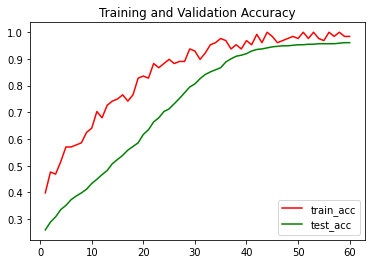

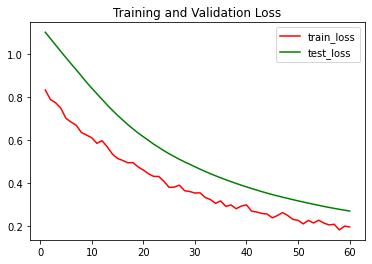

In [0]:
#custom line colors
x = range(1, 60+1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(x, train_acc, 'r') # label='training accuracy'
plt.plot(x, val_acc, 'g') # label='validation accuracy'
plt.title('Training and Validation Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')

plt.figure()
plt.plot(x, train_loss, 'r') # label='training loss'
plt.plot(x, val_loss, 'g') # label='validation loss'
plt.title('Training and Validation Loss')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

In [0]:
base_model.trainable = True

In [0]:
model_nasnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [0]:
model_nasnet.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 7, 7, 1056)        4269716   
_________________________________________________________________
global_average_pooling2d_6 ( (None, 1056)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 2114      
Total params: 4,271,830
Trainable params: 4,235,092
Non-trainable params: 36,738
_________________________________________________________________


In [0]:
history_fine = model_nasnet.fit(trainset,epochs=80,initial_epoch=history.epoch[-1]+1,validation_data=testset)

Train for 4 steps, validate for 16 steps
Epoch 61/80
4/4 [==============================] - 28s 7s/step - loss: 0.1532 - accuracy: 0.9766 - val_loss: 0.1584 - val_accuracy: 0.9785
Epoch 62/80
4/4 [==============================] - 3s 640ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9902
Epoch 63/80
4/4 [==============================] - 3s 649ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0701 - val_accuracy: 0.9922
Epoch 64/80
4/4 [==============================] - 3s 638ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 0.9922
Epoch 65/80
4/4 [==============================] - 3s 644ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0475 - val_accuracy: 0.9922
Epoch 66/80
4/4 [==============================] - 3s 636ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9922
Epoch 67/80
4/4 [==============================] - 3s 650ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.03

In [0]:
train_acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

train_loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

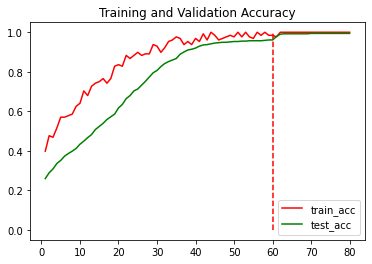

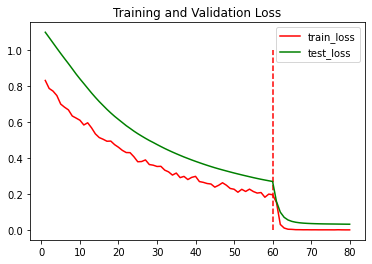

In [0]:
#custom line colors
x = range(1, 80+1)

plt.vlines(60, 0, 1, colors = "r", linestyles = "dashed")
plt.plot(x, train_acc, 'r') # label='training accuracy'
plt.plot(x, val_acc, 'g') # label='validation accuracy'
plt.title('Training and Validation Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')

plt.figure()
plt.vlines(60, 0, 1, colors = "r", linestyles = "dashed")
plt.plot(x, train_loss, 'r') # label='training loss'
plt.plot(x, val_loss, 'g') # label='validation loss'
plt.title('Training and Validation Loss')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

In [0]:
model_nasnet.save('model_nasnet.h5')

## ***model ensemble***

In [0]:
model_vgg = keras.models.load_model('model_vgg16.h5')

In [0]:
model_densenet = keras.models.load_model('model_densenet121.h5')

In [0]:
model_nasnet = keras.models.load_model('model_nasnet.h5')

In [0]:
'''model_vgg.trainable = False
model_densenet.trainable = False
model_nasnet.trainable = False'''

In [0]:
inputs = tf.keras.Input(shape=(224,224,3))
y1 = model_vgg(inputs)
y2 = model_densenet(inputs)
y3 = model_nasnet(inputs)
outputs = tf.keras.layers.average([y1,y2,y3])
ensemble_model = tf.keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
sequential_21 (Sequential)      (None, 2)            134268738   input_20[0][0]                   
__________________________________________________________________________________________________
sequential_26 (Sequential)      (None, 2)            7039554     input_20[0][0]                   
__________________________________________________________________________________________________
sequential_27 (Sequential)      (None, 2)            4271830     input_20[0][0]                   
______________________________________________________________________________________________

In [0]:
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [0]:
ensemble_model.evaluate(testset)

16/16 [==============================] - 10s 607ms/step - loss: 0.0340 - accuracy: 0.9902


[0.03397280155331828, 0.9902344]

# ***Autoencoder***

In [0]:
latent_dim = 100
input_shape = (224,224,3)

In [0]:
# build the Encoder Model
inputs = tf.keras.Input(shape=input_shape, name='encoder_input')
x = inputs

x = Conv2D(filters=32,kernel_size=3,strides=2,activation='relu',padding='same')(x)
x = Conv2D(filters=64,kernel_size=3,strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.3)(x)
x = Conv2D(filters=128,kernel_size=3,strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dropout(0.25)(x)
x = Conv2D(filters=256,kernel_size=3,strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dropout(0.25)(x)
x = Conv2D(filters=512,kernel_size=3,strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.3)(x)

# Generate the latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# Instantiate Encoder Model
encoder = tf.keras.Model(inputs, latent, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 64)        256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512 

In [0]:
# Build the Decoder Model
latent_inputs = tf.keras.Input(shape=(latent_dim,), name='decoder_input')
x = Dense(7*7*512)(latent_inputs)
x = Reshape((7,7,512))(x)

x = Conv2DTranspose(filters=512,kernel_size=3,strides=1,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.3)(x)
x = Dropout(0.25)(x)
x = Conv2DTranspose(filters=256,kernel_size=3,strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dropout(0.25)(x)
x = Conv2DTranspose(filters=128,kernel_size=3,strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2DTranspose(filters=64,kernel_size=3,strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.3)(x)
x = Conv2DTranspose(filters=32,kernel_size=3,strides=2,activation='relu',padding='same')(x)

x = Conv2D(filters=3,kernel_size=3,padding='same')(x)
outputs = tf.keras.layers.Activation('sigmoid', name='decoder_output')(x)

# Instantiate Decoder Model
decoder = tf.keras.Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 100)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 25088)             2533888   
_________________________________________________________________
reshape_14 (Reshape)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_transpose_83 (Conv2DT (None, 7, 7, 512)         2359808   
_________________________________________________________________
batch_normalization_94 (Batc (None, 7, 7, 512)         2048      
_________________________________________________________________
leaky_re_lu_107 (LeakyReLU)  (None, 7, 7, 512)         0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 7, 7, 512)         0   

In [0]:
# Autoencoder = Encoder + Decoder
# Instantiate Autoencoder Model
autoencoder = tf.keras.Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 224, 224, 3)]     0         
_________________________________________________________________
encoder (Model)              (None, 100)               4081316   
_________________________________________________________________
decoder (Model)              (None, 224, 224, 3)       6465603   
Total params: 10,546,919
Trainable params: 10,543,079
Non-trainable params: 3,840
_________________________________________________________________


In [0]:
autoencoder.compile(loss='mae', optimizer='adam')

In [0]:
x_train.shape

(128, 224, 224, 3)

In [0]:
# adding noise with normal dist centered at 0.5 and std=0.5
noise = (np.random.normal(loc=0.5, scale=0.5, size=x_train.shape))
x_train_noisy = x_train + noise

In [0]:
# np.clip (limit) the values in an array.
# values smaller than 0 become 0, and values larger than 1 become 1.
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

In [0]:
x_train.shape,x_train_noisy.shape

((128, 224, 224, 3), (128, 224, 224, 3))

In [0]:
autoencoder.fit(x_train_noisy,x_train,epochs=500,batch_size=32)

Train on 128 samples
Epoch 1/500
128/128 [==============================] - 10s 78ms/sample - loss: 0.2809
Epoch 2/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.2448
Epoch 3/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.2308
Epoch 4/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.2240
Epoch 5/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.2133
Epoch 6/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.2040
Epoch 7/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.1968
Epoch 8/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.1894
Epoch 9/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.1857
Epoch 10/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.1798
Epoch 11/500
128/128 [==============================] - 1s 6ms/sample - loss: 0.1767
Epoch 12/500
128/128 [=============================

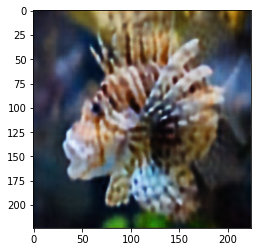

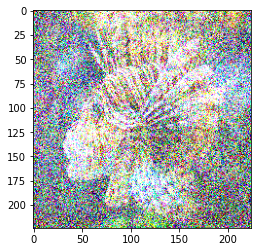

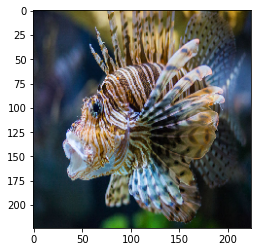

In [0]:
img = x_train_noisy[10]
img = np.reshape(img,(1,224,224,3))
new_img = autoencoder.predict(img)
new_img = np.reshape(new_img,(224,224,3))
plt.figure()
plt.imshow(new_img)

img_noisy = x_train_noisy[10]
plt.figure()
plt.imshow(img_noisy)

img = x_train[10]
plt.figure()
plt.imshow(img)

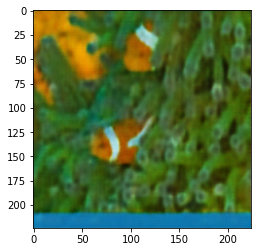

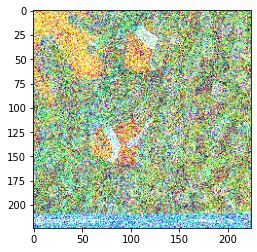

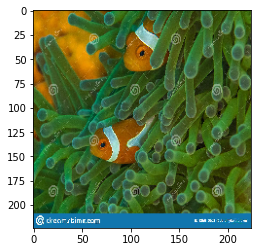

In [0]:
img = x_train_noisy[0]
img = np.reshape(img,(1,224,224,3))
new_img = autoencoder.predict(img)
new_img = np.reshape(new_img,(224,224,3))
plt.figure()
plt.imshow(new_img)

img_noisy = x_train_noisy[0]
plt.figure()
plt.imshow(img_noisy)

img = x_train[0]
plt.figure()
plt.imshow(img)

In [0]:
x_train_noisy.shape

(128, 224, 224, 3)

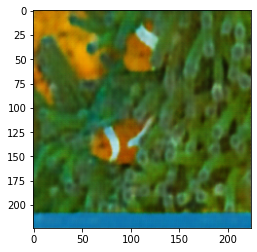

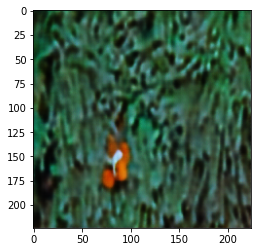

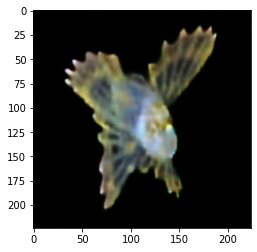

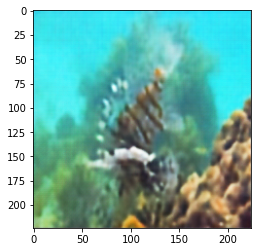

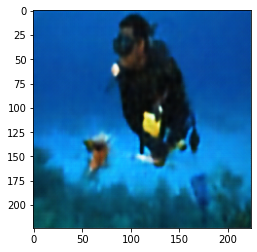

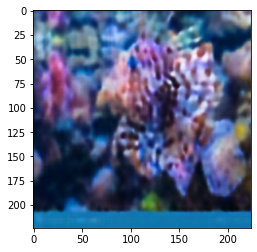

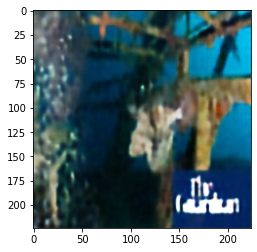

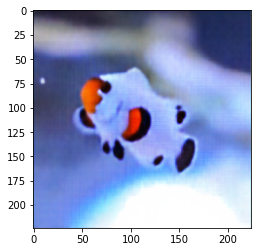

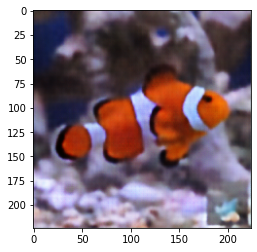

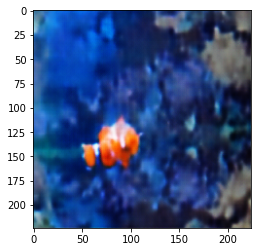

In [0]:
new_img = autoencoder.predict(x_train_noisy)
for i in range (10):
   plt.figure()
   plt.imshow(new_img[i])

In [0]:
model_nasnet = keras.models.load_model('model_nasnet.h5')

In [0]:
model_nasnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [0]:
model_nasnet.evaluate(new_img,y_train)

128/128 [==============================] - 4s 28ms/sample - loss: 0.0320 - accuracy: 0.9844


[0.03200365765951574, 0.984375]

# ***train obj detection***

In [0]:
!nvcc --version # Cuda compilation tools, release 10.0, V10.0.130

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
import tensorflow as tf
tf.__version__

'2.2.0-rc1'

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [0]:
from google.colab import drive # coonect to my private google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = "/content/gdrive/My Drive/Colab Notebooks/DL_for_software"
os.chdir(path)
os.listdir(path) # show the path

['000000008021.jpg',
 'darknet',
 'keras-yolo3',
 'person.jpg',
 'yolov3workflow',
 'object detection.ipynb',
 'output.avi',
 'images',
 'Mask_RCNN',
 'research',
 'corrupted_and_denoised.png',
 'professor_files',
 'final',
 'cocoapi']

In [0]:
%cd /content/gdrive/My Drive/Colab Notebooks/DL_for_software/research/object_detection

/content/gdrive/My Drive/Colab Notebooks/DL_for_software/research/object_detection


In [0]:
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /research/

fatal: destination path 'cocoapi' already exists and is not an empty directory.
python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the 

In [0]:
import os
os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/Colab Notebooks/DL_for_software/research:/content/gdrive/My Drive/Colab Notebooks/DL_for_software/research/slim/'

In [0]:
# !export PYTHONPATH=$PYTHONPATH:':/content/gdrive/My Drive/Colab Notebooks/DL_for_software/research:/content/gdrive/My Drive/Colab Notebooks/DL_for_software/research/slim/'

In [0]:
# under /research/ dir to test
# !python object_detection/builders/model_builder_test.py

### ***ssd_mobilenet_v2 from scratch***

In [0]:
# don't touch it! or the 10000 record will be overwritten
# !python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v2_coco.config

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Instructions for updating:
Use object_detection/model_main.py.
W0127 02:17:55.923119 140621887317888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.

W0127 02:17:55.923302 140621887317888 module_wrapper.py:139] From train.py:91: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0127 02:17:55.923723 140621887317888 module_wrapper.py:139] From /content/gdrive/My Drive/Colab Notebooks/DL_for_software/research/object_detectio

In [0]:
# !tensorboard --logdir=training/

try more 20000 times

In [0]:
# don't touch it! or the 30000 record will be overwritten
# !python train.py --logtostderr --train_dir=training-30000/ --pipeline_config_path=training-30000/ssd_mobilenet_v2_coco.config

In [0]:
# !python train.py --logtostderr --train_dir=training-50000/ --pipeline_config_path=training-50000/ssd_mobilenet_v2_coco.config

### ***pretrained ssd_mobilenet_v2_coco***

In [0]:
# !python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v2_coco.config

流式输出内容被截断，只能显示最后 5000 行内容。
I0327 02:38:56.185392 139923813271424 learning.py:507] global step 47508: loss = 3.8741 (0.201 sec/step)
INFO:tensorflow:global step 47509: loss = 0.4773 (0.200 sec/step)
I0327 02:38:56.387102 139923813271424 learning.py:507] global step 47509: loss = 0.4773 (0.200 sec/step)
INFO:tensorflow:global step 47510: loss = 1.0306 (0.216 sec/step)
I0327 02:38:56.605224 139923813271424 learning.py:507] global step 47510: loss = 1.0306 (0.216 sec/step)
INFO:tensorflow:global step 47511: loss = 0.8780 (0.149 sec/step)
I0327 02:38:56.755664 139923813271424 learning.py:507] global step 47511: loss = 0.8780 (0.149 sec/step)
INFO:tensorflow:global step 47512: loss = 1.1523 (0.146 sec/step)
I0327 02:38:56.903620 139923813271424 learning.py:507] global step 47512: loss = 1.1523 (0.146 sec/step)
INFO:tensorflow:global step 47513: loss = 0.9695 (0.224 sec/step)
I0327 02:38:57.129174 139923813271424 learning.py:507] global step 47513: loss = 0.9695 (0.224 sec/step)
INFO:tensorfl

In [0]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v2_coco.config

流式输出内容被截断，只能显示最后 5000 行内容。
I0328 19:04:44.292162 140083063605120 learning.py:507] global step 47509: loss = 0.6607 (0.232 sec/step)
INFO:tensorflow:global step 47510: loss = 0.4377 (0.199 sec/step)
I0328 19:04:44.492598 140083063605120 learning.py:507] global step 47510: loss = 0.4377 (0.199 sec/step)
INFO:tensorflow:global step 47511: loss = 0.7140 (0.198 sec/step)
I0328 19:04:44.692324 140083063605120 learning.py:507] global step 47511: loss = 0.7140 (0.198 sec/step)
INFO:tensorflow:global step 47512: loss = 0.6327 (0.200 sec/step)
I0328 19:04:44.894284 140083063605120 learning.py:507] global step 47512: loss = 0.6327 (0.200 sec/step)
INFO:tensorflow:global step 47513: loss = 0.4979 (0.229 sec/step)
I0328 19:04:45.124830 140083063605120 learning.py:507] global step 47513: loss = 0.4979 (0.229 sec/step)
INFO:tensorflow:global step 47514: loss = 0.9561 (0.163 sec/step)
I0328 19:04:45.290131 140083063605120 learning.py:507] global step 47514: loss = 0.9561 (0.163 sec/step)
INFO:tensorfl